In [ ]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.manual_seed(42)

train_data = torchvision.datasets.CIFAR10(
    root='CIFAR10/train',
    train=True,
    download=True,
    #transform=train_transform,
    transform=ToTensor()
)

test_data = torchvision.datasets.CIFAR10(
    root='CIFAR10/test',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 170M/170M [00:05<00:00, 33.7MB/s]


Extracting CIFAR10/train/cifar-10-python.tar.gz to CIFAR10/train


100%|██████████| 170M/170M [00:03<00:00, 47.3MB/s]


Extracting CIFAR10/test/cifar-10-python.tar.gz to CIFAR10/test


In [ ]:
train_data, test_data

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: CIFAR10/train
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: CIFAR10/test
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
train_data.classes, len(train_data.classes)

(['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 10)

In [ ]:
# Access the data and calculate shape
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=len(train_data))
train_data_tensor = next(iter(train_data_loader))[0]
print(train_data_tensor.shape)

# Calculating mean and std
mean = train_data_tensor.mean(dim=[0, 2, 3])
std = train_data_tensor.std(dim=[0, 2, 3])

print(mean)
print(std)

torch.Size([50000, 3, 32, 32])
tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.1),
    transforms.RandomVerticalFlip(p=0.1),
    transforms.RandomRotation(degrees=(0, 45)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2470, 0.2435, 0.2616)),
    ToTensor()
])

train_data.train_transform = train_transform

(-0.5, 31.5, 31.5, -0.5)

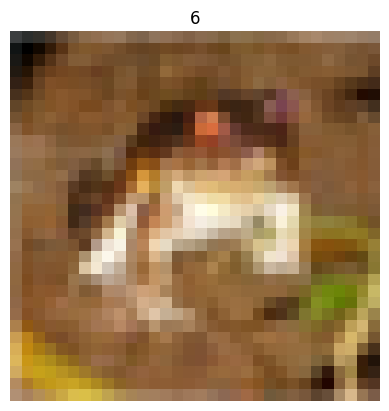

In [ ]:
image, label = train_data[0]

image = image.permute(1, 2, 0)
plt.imshow(image.squeeze())
plt.title(label)
plt.axis("off")

In [ ]:
from torch.utils.data import DataLoader

torch.manual_seed(42)

train_loader = DataLoader(
    dataset=train_data,
    batch_size=64,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_data,
    shuffle=False
)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7cad6ba07070>,
 <torch.utils.data.dataloader.DataLoader at 0x7cad6f3dea40>)

In [ ]:
len(train_loader), len(test_loader)

(782, 10000)

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
example_data.shape, example_targets.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [ ]:
# AlexNet
"""
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32
            nn.Dropout(0.35),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=128, kernel_size=5, padding=2), # 128 x 16 x 16
            nn.Dropout(0.35),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 128 x 8 x 8
        )
        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2), # 128 x 8 x 8
            nn.Dropout(0.35),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 128 x 4 x 4
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 128 x 4 x 4
            nn.Linear(in_features=128*4*4, out_features=256),
            nn.Dropout(0.35),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=10)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.classifier(x)
        return x
"""

'\nclass CNN(nn.Module):\n    def __init__(self):\n        super().__init__() # 3 x 32 x 32\n        self.block_1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2), # 32 x 32 x 32\n            nn.Dropout(0.35),\n            nn.BatchNorm2d(32),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2), # 32 x 16 x 16\n        )\n        self.block_2 = nn.Sequential(\n            nn.Conv2d(in_channels=32, out_channels=128, kernel_size=5, padding=2), # 128 x 16 x 16\n            nn.Dropout(0.35),\n            nn.BatchNorm2d(128),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2) # 128 x 8 x 8\n        )\n        self.block_3 = nn.Sequential(\n            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2), # 128 x 8 x 8\n            nn.Dropout(0.35),\n            nn.BatchNorm2d(128),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2), # 128 x 4 x 4\n        )\n        self.classifier = nn

In [ ]:
# Resnet Block
class ResNet_convert_dim(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, stride=stride),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        return self.block(x)

In [ ]:
# Conv + Res block
class Conv_Res_block(nn.Module):
    def __init__(self, in_channels, out_channels, padding=1):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.block = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=padding),
            nn.Dropout(0.5),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, padding=padding),
            nn.Dropout(0.5),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        self.res_block = ResNet_convert_dim(in_channels, out_channels, 1)

    def forward(self, x):
        if self.in_channels != self.out_channels:
            return self.block(x) + self.res_block(x)
        return self.block(x) + x

In [ ]:
# ResNet-10
class CNN(nn.Module):
    def __init__(self):
        super().__init__() # 3 x 32 x 32
        self.block_1 = Conv_Res_block(in_channels=3, out_channels=32) # 32 x 32 x 32
        #self.block_1_2 = Conv_Res_block(in_channels=32, out_channels=32) # 32 x 32 x 32
        #self.block_1_3 = Conv_Res_block(in_channels=32, out_channels=32) # 32 x 32 x 32

        self.block_2 = Conv_Res_block(in_channels=32, out_channels=64) # 64 x 16 x 16
        #self.block_2_2 = Conv_Res_block(in_channels=64, out_channels=64) # 64 x 16 x 16
        #self.block_2_3 = Conv_Res_block(in_channels=64, out_channels=64) # 64 x 16 x 16
        #self.block_2_4 = Conv_Res_block(in_channels=64, out_channels=64) # 64 x 16 x 16

        self.block_3 = Conv_Res_block(in_channels=64, out_channels=128) # 128 x 8 x 8
        #self.block_3_2 = Conv_Res_block(in_channels=128, out_channels=128) # 128 x 8 x 8
        #self.block_3_3 = Conv_Res_block(in_channels=128, out_channels=128) # 128 x 8 x 8
        #self.block_3_4 = Conv_Res_block(in_channels=128, out_channels=128) # 128 x 8 x 8

        self.block_4 = Conv_Res_block(in_channels=128, out_channels=256) # 256 x 4 x 4
        #self.block_4_2 = Conv_Res_block(in_channels=256, out_channels=256) # 256 x 4 x 4
        #self.block_4_3 = Conv_Res_block(in_channels=256, out_channels=256) # 256 x 4 x 4
        #self.block_4_4 = Conv_Res_block(in_channels=256, out_channels=256) # 256 x 4 x 4
        #self.block_4_5 = Conv_Res_block(in_channels=256, out_channels=256) # 256 x 4 x 4

        #self.block_5 = Conv_Res_block(in_channels=256, out_channels=512) # 512 x 2 x 2
        #self.block_5_2 = Conv_Res_block(in_channels=512, out_channels=512) # 512 x 2 x 2

        self.classifier = nn.Sequential(
            nn.Flatten(), # 512 x 2 x 2
            nn.Linear(in_features=256*4*4, out_features=1024),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=1024),
            nn.BatchNorm1d(1024),
            #nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=512),
            nn.BatchNorm1d(512),
            #nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=10)
            #nn.Softmax(dim=1)
        )

    def forward(self, x: torch.Tensor): # 3 x 32 x 32
        x_1 = self.block_1(x) # 32 x 32 x 32
        #x_1 = self.block_1_2(x_1)
        #x_1 = self.block_1_3(x_1)
        x_1 = nn.MaxPool2d(kernel_size=2)(x_1)

        x_2 = self.block_2(x_1) # 64 x 16 x 16
        #x_2 = self.block_2_2(x_2)
        #x_2 = self.block_2_3(x_2)
        #x_2 = self.block_2_4(x_2)
        x_2 = nn.MaxPool2d(kernel_size=2)(x_2)

        x_3 = self.block_3(x_2) # 128 x 8 x 8
        #x_3 = self.block_3_2(x_3)
        #x_3 = self.block_3_3(x_3)
        #x_3 = self.block_3_4(x_3)
        x_3 = nn.MaxPool2d(kernel_size=2)(x_3)

        x_4 = self.block_4(x_3) # 256 x 4 x 4
        #x_4 = self.block_4_2(x_4)
        #x_4 = self.block_4_3(x_4)
        #x_4 = self.block_4_4(x_4)
        #x_4 = self.block_4_5(x_4)
        #x_4 = nn.MaxPool2d(kernel_size=2)(x_4)

        #x_5 = self.block_5(x_4) # 512 x 2 x 2
        #x_5 = self.block_5_2(x_5)

        y = self.classifier(x_4)
        return y

In [ ]:
torch.manual_seed(42)

network = CNN().to(device)
network

CNN(
  (block_1): Conv_Res_block(
    (block): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Dropout(p=0.5, inplace=False)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
      (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): Dropout(p=0.5, inplace=False)
      (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): ReLU()
    )
    (res_block): ResNet_convert_dim(
      (block): Sequential(
        (0): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
  )
  (block_2): Conv_Res_block(
    (block): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Dropout(p=0.5, inplace=False)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, a

In [ ]:
random_input_image = (1, 3, 32, 32)
random_input_image_error = (1, 3, 250, 250)

summary(CNN(),
        input_size=random_input_image,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
CNN (CNN)                                     [1, 3, 32, 32]       [1, 10]              --                   True
├─Conv_Res_block (block_1)                    [1, 3, 32, 32]       [1, 32, 32, 32]      --                   True
│    └─Sequential (block)                     [1, 3, 32, 32]       [1, 32, 32, 32]      --                   True
│    │    └─Conv2d (0)                        [1, 3, 32, 32]       [1, 32, 32, 32]      896                  True
│    │    └─Dropout (1)                       [1, 32, 32, 32]      [1, 32, 32, 32]      --                   --
│    │    └─BatchNorm2d (2)                   [1, 32, 32, 32]      [1, 32, 32, 32]      64                   True
│    │    └─ReLU (3)                          [1, 32, 32, 32]      [1, 32, 32, 32]      --                   --
│    │    └─Conv2d (4)                        [1, 32, 32, 32]      [1, 32, 32, 32]     

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=network.parameters(),
                            lr=0.01,
                            momentum=0.9,
                            weight_decay=0.0001)

from helper_functions import accuracy_fn

In [ ]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device):

    list_train_loss, list_train_acc = [], []
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Move X and y to the same device as the model
        X, y = X.to(device), y.to(device)

        # 1. forward pass
        y_pred = model(X)

        # 2. cal loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # 3. optimizer 0 grad
        optimizer.zero_grad()

        # 4. loss back
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        if (batch + 1) % 100 == 0:
            train_loss_batch = train_loss / (batch + 1)
            train_acc_batch = train_acc / (batch + 1)
            print(f"Train batch: {batch + 1} | Train loss: {train_loss_batch:.5f} | Train acc: {train_acc_batch:.5f}")

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    list_train_loss.append(train_loss)
    list_train_acc.append(train_acc)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")
    return list_train_loss, list_train_acc

In [ ]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device):

    list_test_loss, list_test_acc = [], []
    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            # Move X and y to the same device as the model
            X, y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))

            if (batch + 1) % 2000 == 0:
                test_loss_batch = test_loss / (batch + 1)
                test_acc_batch = test_acc / (batch + 1)
                print(f"Test batch: {batch + 1} | Test loss: {test_loss_batch:.5f} | Test acc: {test_acc_batch:.5f}")

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        list_test_loss.append(test_loss)
        list_test_acc.append(test_acc)

        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}\n")
    return list_test_loss, list_test_acc

In [ ]:
torch.manual_seed(42)

from tqdm.auto import tqdm

epochs = 50

train_loss, train_acc = [], []
test_loss, test_acc = [], []

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")

    train_loss, train_acc = train_step(model=network,
              data_loader=train_loader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)

    test_loss, test_acc = test_step(model=network,
             data_loader=test_loader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0
Train batch: 100 | Train loss: 2.01914 | Train acc: 25.42188
Train batch: 200 | Train loss: 1.87151 | Train acc: 30.89844
Train batch: 300 | Train loss: 1.78889 | Train acc: 33.82292
Train batch: 400 | Train loss: 1.72617 | Train acc: 36.21484
Train batch: 500 | Train loss: 1.67874 | Train acc: 38.17500
Train batch: 600 | Train loss: 1.64319 | Train acc: 39.48438
Train batch: 700 | Train loss: 1.61402 | Train acc: 40.69866
Train loss: 1.58541 | Train acc: 41.73194
Test batch: 2000 | Test loss: 2.74244 | Test acc: 25.20000
Test batch: 4000 | Test loss: 2.76240 | Test acc: 25.05000
Test batch: 6000 | Test loss: 2.75995 | Test acc: 25.06667
Test batch: 8000 | Test loss: 2.75730 | Test acc: 25.08750
Test batch: 10000 | Test loss: 2.77970 | Test acc: 24.67000
Test loss: 2.77970 | Test acc: 24.67000

Epoch: 1
Train batch: 100 | Train loss: 1.59570 | Train acc: 42.76562
Train batch: 200 | Train loss: 1.48404 | Train acc: 46.32812
Train batch: 300 | Train loss: 1.41314 | Train acc: 49